<table>
<tr><td><img style="height: 150px;" src="images/geo_hydro1.jpg"></td>
<td bgcolor="#FFFFFF">
    <p style="font-size: xx-large; font-weight: 900; line-height: 100%">AG Dynamics of the Earth</p>
    <p style="font-size: large; color: rgba(0,0,0,0.5);">Jupyter notebooks</p>
    <p style="font-size: large; color: rgba(0,0,0,0.5);">Georg Kaufmann</p>
    </td>
</tr>
</table>

# Angewandte Geophysik II: Kap 8: Georadar
# Laufzeitkurven
----
*Georg Kaufmann,
Geophysics Section,
Institute of Geological Sciences,
Freie Universität Berlin,
Germany*

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import ipywidgets as widgets

In [11]:
# define profile
xmin  = 0.
xmax  = +50.
xstep = 101
x = np.linspace(xmin,xmax,xstep)

In [12]:
epsilon0 = 8.8541878128e-12 # A s/V/m
mu0      = 4.*np.pi*1e-7    # N/A^2
c0       = 1/np.sqrt(epsilon0*mu0)
print(c0)

299792458.0816064


In [26]:
er1 = 4  # dry sand
er1 = 30 # wet sand
er2 = 6  # limestone
c1 = c0/np.sqrt(er1)
c2 = c0/np.sqrt(er2)
h1 = 5. # m

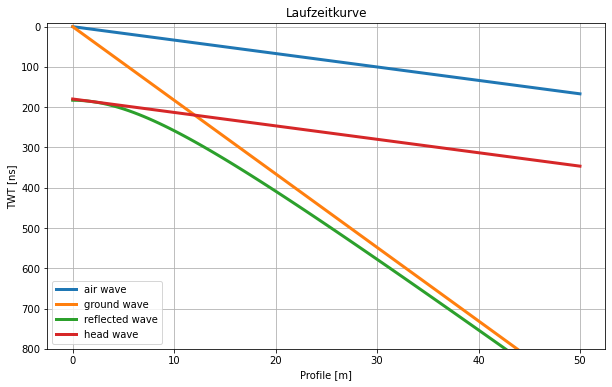

In [30]:
tair = x/c0
tground = x/c1
treflex = 1/c1 * np.sqrt(x**2 + 4*h1**2)
thead   = x/c0 + 2*h1*np.sqrt(1/c1**2 - 1/c0**2)

plt.figure(figsize=(10,6))
plt.title('Laufzeitkurve')
plt.xlabel('Profile [m]')
plt.ylabel('TWT [ns]')
plt.ylim([800,-10])
plt.plot(x,tair*1e9,lw=3,label='air wave')
plt.plot(x,tground*1e9,lw=3,label='ground wave')
plt.plot(x,treflex*1e9,lw=3,label='reflected wave')
plt.plot(x,thead*1e9,lw=3,label='head wave')
plt.grid()
plt.legend()

In [85]:
def traveltime(er1,er2=2,h1=5):
    """
    traveltime curve with wave types for specific material
    """
    er = [4,30,6]
    # define profile
    x = np.linspace(0,50,101)
    # define constants
    epsilon0 = 8.8541878128e-12 # A s/V/m
    mu0      = 4.*np.pi*1e-7    # N/A^2
    c0       = 1/np.sqrt(epsilon0*mu0)
    # layers
    c1 = c0/np.sqrt(er[er1])
    c2 = c0/np.sqrt(er[er2])
    # calculate travel times
    tair = x/c0
    tground = x/c1
    treflex = 1/c1 * np.sqrt(x**2 + 4*h1**2)
    thead   = x/c0 + 2*h1*np.sqrt(1/c1**2 - 1/c0**2)
    # plot
    plt.figure(figsize=(10,6))
    plt.title('Laufzeitkurve')
    plt.xlabel('Profile [m]')
    plt.ylabel('TWT [ns]')
    plt.ylim([800,-10])
    plt.plot(x,tair*1e9,lw=3,label='air wave')
    plt.plot(x,tground*1e9,lw=3,label='ground wave')
    plt.plot(x,treflex*1e9,lw=3,label='reflected wave')
    plt.plot(x,thead*1e9,lw=3,label='head wave')
    plt.grid()
    plt.legend()

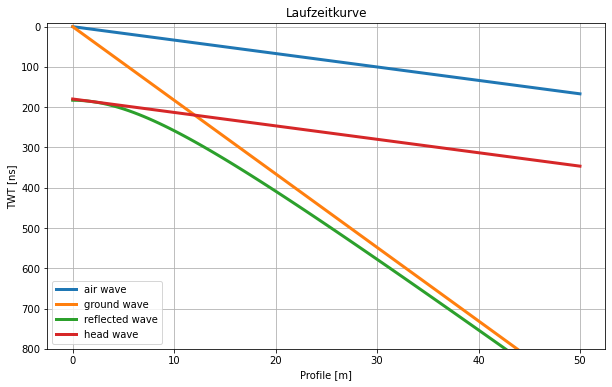

In [86]:
traveltime(er1=1)

In [92]:
# call interactive module
w = dict(
er1 = widgets.Dropdown(options=[('dry sand', 0), ('wet sand', 1), ('limestone', 2)],value=1,description='Material:'))
output = widgets.interactive_output(traveltime, w)
box = widgets.VBox([*w.values(), output])
display(box)

... done